In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time


In [5]:
data_= pd.read_csv('data/customer_preprocessed_data.csv')

In [28]:
data_['pre_booked'].unique()

array(['0', '0,1', '1'], dtype=object)

In [10]:
data = data_[['fare_total','profile_engaged_period']]

In [11]:
data.dtypes

fare_total                float64
profile_engaged_period      int64
dtype: object

In [13]:
data[data.fare_total == 0] = data['fare_total'].mean()
data[data.profile_engaged_period == 0] = data['profile_engaged_period'].mean()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

In [16]:
dataNP = np.asarray(data)

dataNP[:, [0]] = np.log(dataNP[:, [0]])
dataNP[:, [1]] = np.log(dataNP[:, [1]])

In [22]:
#Uncomment this to tune cluster parameters
kmeans = KMeans()
# specify parameters and distributions to sample from
param_dist = {"init": ['k-means++', 'random'],
              "n_init": sp_randint(1, 20),
              "max_iter": sp_randint(300, 600),
              "n_clusters":sp_randint(1, 10)}

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(kmeans, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(dataNP)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 4193.06 seconds for 50 candidates parameter settings.


In [23]:
#Initializing KMeans
kmeans = KMeans(init = random_search.best_params_.get('init'), n_init = random_search.best_params_.get('n_init'), max_iter = random_search.best_params_.get('max_iter'),n_clusters = random_search.best_params_.get('n_clusters'))
#Fitting with inputs
kmeans = kmeans.fit(dataNP)

In [24]:
labels = kmeans.predict(dataNP)

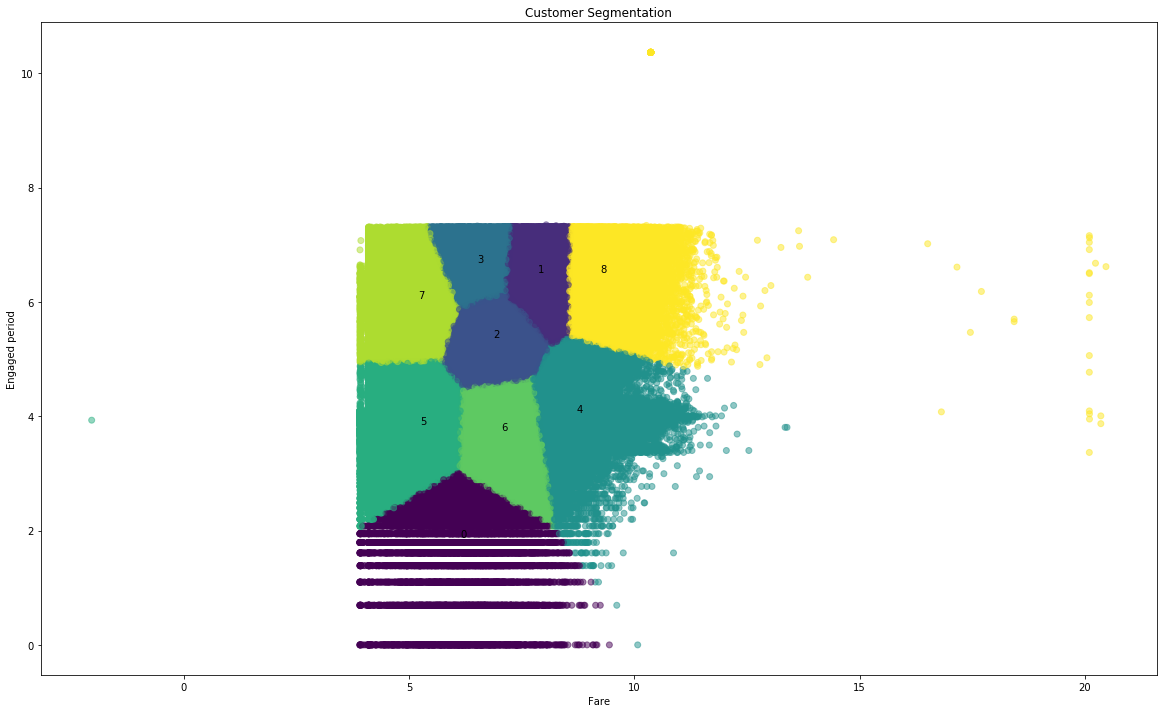

In [25]:
# Getting the cluster centers and plot
C = kmeans.cluster_centers_
fig = plt.figure(2,figsize=(20, 12))
plt.scatter(dataNP[:, 0], dataNP[:, 1], c=labels.astype(np.float),alpha=0.5)
clusterNo = 0
for cluster in C:
    plt.text(C[:, 0][clusterNo], C[:, 1][clusterNo], str(clusterNo), None)
    clusterNo += 1

plt.xlabel('Fare')
plt.ylabel('Engaged period')
plt.title('Customer Segmentation')
plt.show()

In [26]:
# Appending cluster label to original data
data_['CLUSTER']=labels

In [38]:
data_.to_csv('data/customer_segmentation.csv',index=False)

In [40]:
data_ = data_.replace({'pre_booked' : { '0' : 'method_0', '1' : 'method_1', '0,1' : 'both' }})